In [1]:
import numpy as np
import pandas as pd
from glob import glob
# merge csv files
yelp = pd.read_csv('yelp_reviews.csv')


print(yelp.shape)
yelp.head()

(7012462, 2)


,review_stars,text
0,4,What a treat it was to find Sidebar in Downtow...
1,5,I love Sunchain! I have been a customer for ov...
2,3,The food is good. But the service is suck comp...
3,1,We went here the first week they opened and we...
4,1,"Beware, discriminating amongst the gay communi..."


Text(0, 0.5, 'Reviews of yelp dataset')

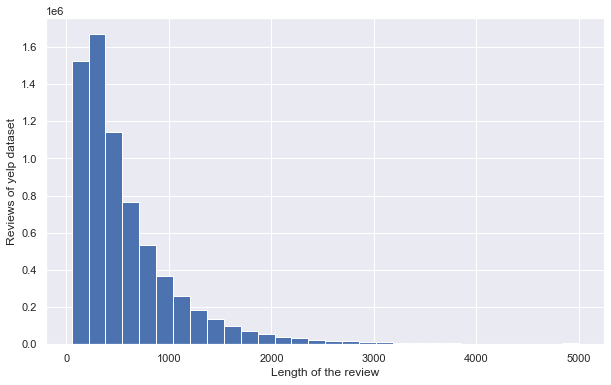

In [2]:
import matplotlib.pyplot as plt
import seaborn


plt.rc('figure', figsize=(10,6))
seaborn.set()
colors = seaborn.color_palette()
yelp.text.dropna().str.len().hist(bins=30)
plt.xlabel('Length of the review')
plt.ylabel('Number of reviews')
plt.ylabel('Reviews of yelp dataset')

In [6]:
sorted(yelp['review_stars'].unique())

[1, 2, 3, 4, 5]

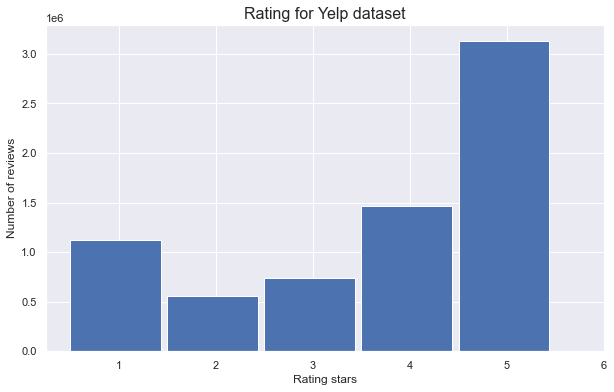

In [5]:
bins = [1 ,2 ,3 ,4, 5, 6]
yelp.review_stars.hist(bins=bins, align='left', width=0.93)
plt.xticks(bins)
plt.xlabel('Rating stars')
plt.ylabel('Number of reviews')
plt.title("Rating for Yelp dataset", fontsize=16)
plt.show()

In [6]:
#Average Rating of Fitness
ratings = list(yelp['review_stars'])
print("Average Rating of Yelp dataset is:",sum(ratings)/len(ratings))

Average Rating of Yelp dataset is: 3.7014236939893577


In [7]:
#average length of reviews
totalreviews = list(yelp['text'])
length = []
for i in range(0,len(totalreviews)):
        totalreviews[i] = str(totalreviews[i])
        a = len(totalreviews[i].split(' '))
        length.append(a)

    
print("On average a review length of Yelp dataset has about:", sum(length)/len(length))

On average a review length of Yelp dataset has about: 110.77891773245973


In [8]:
#total reviews number
len(length)

7012462

In [9]:
yelp['length'] =  length
yelp['ratings'] =  ratings
five_star = yelp.loc[yelp['ratings'] == 5,:]
five = sum(five_star['length'])/len(five_star['length'])
four_star = yelp.loc[yelp['ratings'] == 4,:]
four = sum(four_star['length'])/len(four_star['length'])
three_star = yelp.loc[yelp['ratings'] == 3,:]
three = sum(three_star['length'])/len(three_star['length'])
two_star = yelp.loc[yelp['ratings'] == 2,:]
two = sum(two_star['length'])/len(two_star['length'])
one_star = yelp.loc[yelp['ratings'] == 1,:]
one = sum(one_star['length'])/len(one_star['length'])

In [10]:
print("five:",five,"four:",four,"three:",three,"two:",two,"one:",one)

five: 87.36198927081772 four: 114.31989293512908 three: 131.54477173052345 two: 141.62237319362083 one: 142.536535566161


In [13]:
#5 star has the shortest review length, 2 star has the longest

c:\users\wang\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


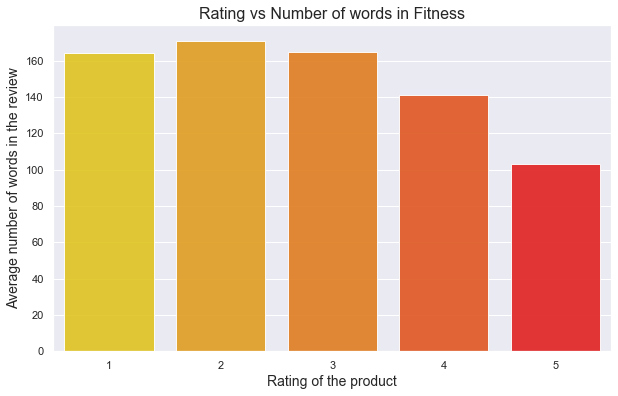

In [14]:
colors = ['#ffd900', '#ffa600','#ff7b00', '#ff4800', '#ff0000']
seaborn.set_palette(seaborn.color_palette(colors))
top = ['1','2','3','4','5']
value = [int(one), int(two),int(three),int(four),int(five)]
seaborn.barplot(top, value, alpha=0.9)
plt.xlabel('Rating of the product', fontsize=14)
plt.ylabel('Average number of words in the review', fontsize=14)
plt.title("Rating vs Number of words in Fitness", fontsize=16)
plt.show()

# Baseline

In [11]:
#The simplest baseline for each of these predictive tasks is a model that always predicts the most common rating.
yelp['baseline_rating'] = 5

print("Baseline of Yelp Dataset = 5" )

Baseline of Yelp Dataset = 5


In [12]:
t = yelp[['review_stars', 'baseline_rating']].dropna(how='any')

In [14]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


precision = metrics.precision_score(t.review_stars, t.baseline_rating, average='macro')
recall = metrics.recall_score(t.review_stars, t.baseline_rating, average='macro')
f1 = metrics.f1_score(t.review_stars, t.baseline_rating, average='macro')
accuracy = accuracy_score(t.review_stars, t.baseline_rating)

baselineResult = {}

data = {'precision':precision,
        'recall':recall,
        'f1_score':f1,
        'accuracy':accuracy}

baselineResult['Baseline of Yelp dataset'] = data
pd.DataFrame(baselineResult).T

,accuracy,f1_score,precision,recall
Baseline of Yelp dataset,0.446849,0.123537,0.08937,0.2


# ________________________________________

In [3]:
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer 
# Term frequency (TF) - Inverse Document Frequency (IDF)

In [4]:
# Instances for pipeline
#verbose = to show progress, higher number show more details
#n_jobs = n of process running in parallelly
svr = LinearSVR(verbose=True, C = 1.0)
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,1),encoding='utf-8')

# from here train_test_split
from here

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(yelp['text'], yelp['review_stars'], test_size=0.3, random_state=1)

In [6]:
pipe_Fitness = Pipeline([('vect', vect), ('svr', svr)])

In [85]:
pipe_Fitness.fit(X_train,y_train)

[LibLinear]

Pipeline(steps=[('vect', TfidfVectorizer(stop_words='english')),
                ('svr', LinearSVR(verbose=True))])

In [86]:
y_pred=pipe_Fitness.predict(X_test)

In [14]:
# if you wanna do gridsearch for better parameter, start from before training model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

pipeline = Pipeline([
    ('vect', vect),
    ('clf', LinearSVR(C=0.5,loss='squared_epsilon_insensitive'))
])

parameters = {
    #'clf__C': (0.5),
    'clf__epsilon': (0.4,0.5,0.6),
     #'clf__loss':('epsilon_insensitive','squared_epsilon_insensitive')
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=4, scoring='r2', verbose=2, cv = 4)
    
grid_search.fit(X_train, y_train)
print('Best score of r^2: ', grid_search.best_score_)
print('Best parameter set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(best_parameters):
    print(param_name, best_parameters[param_name])

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed: 27.9min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed: 27.9min finished


Best score of r^2:  0.6959267777673204
Best parameter set:
clf LinearSVR(C=0.5, epsilon=0.4, loss='squared_epsilon_insensitive')
clf__C 0.5
clf__dual True
clf__epsilon 0.4
clf__fit_intercept True
clf__intercept_scaling 1.0
clf__loss squared_epsilon_insensitive
clf__max_iter 1000
clf__random_state None
clf__tol 0.0001
clf__verbose 0
memory None
steps [('vect', TfidfVectorizer(stop_words='english')), ('clf', LinearSVR(C=0.5, epsilon=0.4, loss='squared_epsilon_insensitive'))]
vect TfidfVectorizer(stop_words='english')
vect__analyzer word
vect__binary False
vect__decode_error strict
vect__dtype <class 'numpy.float64'>
vect__encoding utf-8
vect__input content
vect__lowercase True
vect__max_df 1.0
vect__max_features None
vect__min_df 1
vect__ngram_range (1, 1)
vect__norm l2
vect__preprocessor None
vect__smooth_idf True
vect__stop_words english
vect__strip_accents None
vect__sublinear_tf False
vect__token_pattern (?u)\b\w\w+\b
vect__tokenizer None
vect__use_idf True
vect__vocabulary None
verb

In [13]:
# if you wanna do gridsearch for better parameter, start from before training model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

pipeline = Pipeline([
    ('vect', vect),
    ('clf', LinearSVR())
])

parameters = {
    'clf__C': (0.5,1),
    #'clf__epsilon': (0.4,0.5),
     'clf__loss':('epsilon_insensitive','squared_epsilon_insensitive')
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=4, scoring='r2', verbose=2, cv = 4)
    
grid_search.fit(X_train, y_train)
print('Best score of r^2: ', grid_search.best_score_)
print('Best parameter set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(best_parameters):
    print(param_name, best_parameters[param_name])

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed: 44.8min finished


Best score of r^2:  0.6971779043434123
Best parameter set:
clf LinearSVR(C=0.5, loss='squared_epsilon_insensitive')
clf__C 0.5
clf__dual True
clf__epsilon 0.0
clf__fit_intercept True
clf__intercept_scaling 1.0
clf__loss squared_epsilon_insensitive
clf__max_iter 1000
clf__random_state None
clf__tol 0.0001
clf__verbose 0
memory None
steps [('vect', TfidfVectorizer(stop_words='english')), ('clf', LinearSVR(C=0.5, loss='squared_epsilon_insensitive'))]
vect TfidfVectorizer(stop_words='english')
vect__analyzer word
vect__binary False
vect__decode_error strict
vect__dtype <class 'numpy.float64'>
vect__encoding utf-8
vect__input content
vect__lowercase True
vect__max_df 1.0
vect__max_features None
vect__min_df 1
vect__ngram_range (1, 1)
vect__norm l2
vect__preprocessor None
vect__smooth_idf True
vect__stop_words english
vect__strip_accents None
vect__sublinear_tf False
vect__token_pattern (?u)\b\w\w+\b
vect__tokenizer None
vect__use_idf True
vect__vocabulary None
verbose False


In [11]:
# if you wanna do gridsearch for better parameter, start from before training model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

pipeline = Pipeline([
    ('vect', vect),
    ('clf', LinearSVR())
])

parameters = {
    'clf__C': (0.4,0.5,0.6),
    'clf__epsilon': (0.4,0.5)
    
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=4, scoring='r2', verbose=2, cv = 4)
    
grid_search.fit(X_train, y_train)
print('Best score of r^2: ', grid_search.best_score_)
print('Best parameter set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(best_parameters):
    print(param_name, best_parameters[param_name])

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed: 53.0min finished


Best score of r^2:  0.6956371182725212
Best parameter set:
clf LinearSVR(C=0.4, epsilon=0.5)
clf__C 0.4
clf__dual True
clf__epsilon 0.5
clf__fit_intercept True
clf__intercept_scaling 1.0
clf__loss epsilon_insensitive
clf__max_iter 1000
clf__random_state None
clf__tol 0.0001
clf__verbose 0
memory None
steps [('vect', TfidfVectorizer(stop_words='english')), ('clf', LinearSVR(C=0.4, epsilon=0.5))]
vect TfidfVectorizer(stop_words='english')
vect__analyzer word
vect__binary False
vect__decode_error strict
vect__dtype <class 'numpy.float64'>
vect__encoding utf-8
vect__input content
vect__lowercase True
vect__max_df 1.0
vect__max_features None
vect__min_df 1
vect__ngram_range (1, 1)
vect__norm l2
vect__preprocessor None
vect__smooth_idf True
vect__stop_words english
vect__strip_accents None
vect__sublinear_tf False
vect__token_pattern (?u)\b\w\w+\b
vect__tokenizer None
vect__use_idf True
vect__vocabulary None
verbose False


In [9]:
# if you wanna do gridsearch for better parameter, start from before training model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

pipeline = Pipeline([
    ('vect', vect),
    ('clf', LinearSVR())
])

parameters = {
    'clf__C': (0.4,0.5,0.6,0.7),
    #'clf__epsilon': (0,0.5)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=4, scoring='r2', verbose=2, cv = 3)
    
grid_search.fit(X_train, y_train)
print('Best score of r^2: ', grid_search.best_score_)
print('Best parameter set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(best_parameters):
    print(param_name, best_parameters[param_name])

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed: 25.9min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed: 25.9min finished


Best score of r^2:  0.6871752271015209
Best parameter set:
clf LinearSVR(C=0.4)
clf__C 0.4
clf__dual True
clf__epsilon 0.0
clf__fit_intercept True
clf__intercept_scaling 1.0
clf__loss epsilon_insensitive
clf__max_iter 1000
clf__random_state None
clf__tol 0.0001
clf__verbose 0
memory None
steps [('vect', TfidfVectorizer(stop_words='english')), ('clf', LinearSVR(C=0.4))]
vect TfidfVectorizer(stop_words='english')
vect__analyzer word
vect__binary False
vect__decode_error strict
vect__dtype <class 'numpy.float64'>
vect__encoding utf-8
vect__input content
vect__lowercase True
vect__max_df 1.0
vect__max_features None
vect__min_df 1
vect__ngram_range (1, 1)
vect__norm l2
vect__preprocessor None
vect__smooth_idf True
vect__stop_words english
vect__strip_accents None
vect__sublinear_tf False
vect__token_pattern (?u)\b\w\w+\b
vect__tokenizer None
vect__use_idf True
vect__vocabulary None
verbose False


In [8]:
# if you wanna do gridsearch for better parameter, start from before training model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

pipeline = Pipeline([
    ('vect', vect),
    ('clf', LinearSVR())
])

parameters = {
    'clf__C': (0.1,0.5,10),
    'clf__epsilon': (0,0.5)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=4, scoring='r2', verbose=2, cv = 3)
    
grid_search.fit(X_train, y_train)
print('Best score of r^2: ', grid_search.best_score_)
print('Best parameter set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(best_parameters):
    print(param_name, best_parameters[param_name])

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed: 59.6min finished


Best score of r^2:  0.6952330841915191
Best parameter set:
clf LinearSVR(C=0.5, epsilon=0.5)
clf__C 0.5
clf__dual True
clf__epsilon 0.5
clf__fit_intercept True
clf__intercept_scaling 1.0
clf__loss epsilon_insensitive
clf__max_iter 1000
clf__random_state None
clf__tol 0.0001
clf__verbose 0
memory None
steps [('vect', TfidfVectorizer(stop_words='english')), ('clf', LinearSVR(C=0.5, epsilon=0.5))]
vect TfidfVectorizer(stop_words='english')
vect__analyzer word
vect__binary False
vect__decode_error strict
vect__dtype <class 'numpy.float64'>
vect__encoding utf-8
vect__input content
vect__lowercase True
vect__max_df 1.0
vect__max_features None
vect__min_df 1
vect__ngram_range (1, 1)
vect__norm l2
vect__preprocessor None
vect__smooth_idf True
vect__stop_words english
vect__strip_accents None
vect__sublinear_tf False
vect__token_pattern (?u)\b\w\w+\b
vect__tokenizer None
vect__use_idf True
vect__vocabulary None
verbose False


In [7]:
# if you wanna do gridsearch for better parameter, start from before training model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

pipeline = Pipeline([
    ('vect', vect),
    ('clf', LinearSVR())
])

parameters = {
    'clf__C': (0.5,0.6),
    'clf__epsilon': (0.6,0.7)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=4, scoring='r2', verbose=2, cv = 4)
    
grid_search.fit(X_train, y_train)
print('Best score of r^2: ', grid_search.best_score_)
print('Best parameter set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(best_parameters):
    print(param_name, best_parameters[param_name])

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed: 33.6min finished


Best score of r^2:  0.696926286164631
Best parameter set:
clf LinearSVR(C=0.5, epsilon=0.7)
clf__C 0.5
clf__dual True
clf__epsilon 0.7
clf__fit_intercept True
clf__intercept_scaling 1.0
clf__loss epsilon_insensitive
clf__max_iter 1000
clf__random_state None
clf__tol 0.0001
clf__verbose 0
memory None
steps [('vect', TfidfVectorizer(stop_words='english')), ('clf', LinearSVR(C=0.5, epsilon=0.7))]
vect TfidfVectorizer(stop_words='english')
vect__analyzer word
vect__binary False
vect__decode_error strict
vect__dtype <class 'numpy.float64'>
vect__encoding utf-8
vect__input content
vect__lowercase True
vect__max_df 1.0
vect__max_features None
vect__min_df 1
vect__ngram_range (1, 1)
vect__norm l2
vect__preprocessor None
vect__smooth_idf True
vect__stop_words english
vect__strip_accents None
vect__sublinear_tf False
vect__token_pattern (?u)\b\w\w+\b
vect__tokenizer None
vect__use_idf True
vect__vocabulary None
verbose False


In [6]:
# if you wanna do gridsearch for better parameter, start from before training model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

pipeline = Pipeline([
    ('vect', vect),
    ('clf', LinearSVR())
])

parameters = {
    'clf__C': (0.4,0.6),
    'clf__epsilon': (0.4,0.5,0.6)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=4, scoring='r2', verbose=2, cv = 3)
    
grid_search.fit(X_train, y_train)
print('Best score of r^2: ', grid_search.best_score_)
print('Best parameter set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(best_parameters):
    print(param_name, best_parameters[param_name])

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed: 45.5min finished


Best score of r^2:  0.6962184740111974
Best parameter set:
clf LinearSVR(C=0.4, epsilon=0.6)
clf__C 0.4
clf__dual True
clf__epsilon 0.6
clf__fit_intercept True
clf__intercept_scaling 1.0
clf__loss epsilon_insensitive
clf__max_iter 1000
clf__random_state None
clf__tol 0.0001
clf__verbose 0
memory None
steps [('vect', TfidfVectorizer(stop_words='english')), ('clf', LinearSVR(C=0.4, epsilon=0.6))]
vect TfidfVectorizer(stop_words='english')
vect__analyzer word
vect__binary False
vect__decode_error strict
vect__dtype <class 'numpy.float64'>
vect__encoding utf-8
vect__input content
vect__lowercase True
vect__max_df 1.0
vect__max_features None
vect__min_df 1
vect__ngram_range (1, 1)
vect__norm l2
vect__preprocessor None
vect__smooth_idf True
vect__stop_words english
vect__strip_accents None
vect__sublinear_tf False
vect__token_pattern (?u)\b\w\w+\b
vect__tokenizer None
vect__use_idf True
vect__vocabulary None
verbose False


In [7]:
# if you wanna do gridsearch for better parameter, start from before training model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

pipeline = Pipeline([
    ('vect', vect),
    ('clf', LinearSVR())
])

parameters = {
    'clf__C': (0.3,0.5,1),
    'clf__epsilon': (0.1,0.5)
}

#cv=3 , yifang ram bugou yong
grid_search = GridSearchCV(pipeline, parameters, n_jobs=4, scoring='r2', verbose=2, cv = 3)
    
grid_search.fit(X_train, y_train)
print('Best score of r^2: ', grid_search.best_score_)
print('Best parameter set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(best_parameters):
    print(param_name, best_parameters[param_name])

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed: 33.5min finished


Best score of r^2:  0.6952309684759667
Best parameter set:
clf LinearSVR(C=0.5, epsilon=0.5)
clf__C 0.5
clf__dual True
clf__epsilon 0.5
clf__fit_intercept True
clf__intercept_scaling 1.0
clf__loss epsilon_insensitive
clf__max_iter 1000
clf__random_state None
clf__tol 0.0001
clf__verbose 0
memory None
steps [('vect', TfidfVectorizer(stop_words='english')), ('clf', LinearSVR(C=0.5, epsilon=0.5))]
vect TfidfVectorizer(stop_words='english')
vect__analyzer word
vect__binary False
vect__decode_error strict
vect__dtype <class 'numpy.float64'>
vect__encoding utf-8
vect__input content
vect__lowercase True
vect__max_df 1.0
vect__max_features None
vect__min_df 1
vect__ngram_range (1, 1)
vect__norm l2
vect__preprocessor None
vect__smooth_idf True
vect__stop_words english
vect__strip_accents None
vect__sublinear_tf False
vect__token_pattern (?u)\b\w\w+\b
vect__tokenizer None
vect__use_idf True
vect__vocabulary None
verbose False


In [21]:
# if you wanna do gridsearch for better parameter, start from before 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

pipeline = Pipeline([
    ('vect', vect),
    ('clf', LinearSVR())
])

parameters = {
    'clf__C': (0.5,1,1.5),
    #'clf__epsilon': (0.1,0.5,1)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=4, scoring='r2', verbose=2, cv = 5)
    
grid_search.fit(X_train, y_train)
print('Best score of r^2: ', grid_search.best_score_)
print('Best parameter set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(best_parameters):
    print(param_name, best_parameters[param_name])

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed: 37.3min finished


Best score of r^2:  0.687441012072446
Best parameter set:
clf LinearSVR(C=0.5)
clf__C 0.5
clf__dual True
clf__epsilon 0.0
clf__fit_intercept True
clf__intercept_scaling 1.0
clf__loss epsilon_insensitive
clf__max_iter 1000
clf__random_state None
clf__tol 0.0001
clf__verbose 0
memory None
steps [('vect', TfidfVectorizer(stop_words='english')), ('clf', LinearSVR(C=0.5))]
vect TfidfVectorizer(stop_words='english')
vect__analyzer word
vect__binary False
vect__decode_error strict
vect__dtype <class 'numpy.float64'>
vect__encoding utf-8
vect__input content
vect__lowercase True
vect__max_df 1.0
vect__max_features None
vect__min_df 1
vect__ngram_range (1, 1)
vect__norm l2
vect__preprocessor None
vect__smooth_idf True
vect__stop_words english
vect__strip_accents None
vect__sublinear_tf False
vect__token_pattern (?u)\b\w\w+\b
vect__tokenizer None
vect__use_idf True
vect__vocabulary None
verbose False


In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

pipeline = Pipeline([
    ('vect', vect),
    ('clf', LinearSVR())
])

parameters = {
    'clf__C': (0.5,0.6,0.7,0.8),
    'clf__epsilon': (0.4,0.5,0.6,0.7,0.8)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=4, scoring='r2', verbose=2, cv = 5)
    
grid_search.fit(X_train, y_train)
print('Best score of r^2: ', grid_search.best_score_)
print('Best parameter set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(best_parameters):
    print(param_name, best_parameters[param_name])

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:  5.2min finished


Best score of r^2:  0.7104750057225585
Best parameter set:
clf LinearSVR(C=0.6, epsilon=0.5)
clf__C 0.6
clf__dual True
clf__epsilon 0.5
clf__fit_intercept True
clf__intercept_scaling 1.0
clf__loss epsilon_insensitive
clf__max_iter 1000
clf__random_state None
clf__tol 0.0001
clf__verbose 0
memory None
steps [('vect', TfidfVectorizer(stop_words='english')), ('clf', LinearSVR(C=0.6, epsilon=0.5))]
vect TfidfVectorizer(stop_words='english')
vect__analyzer word
vect__binary False
vect__decode_error strict
vect__dtype <class 'numpy.float64'>
vect__encoding utf-8
vect__input content
vect__lowercase True
vect__max_df 1.0
vect__max_features None
vect__min_df 1
vect__ngram_range (1, 1)
vect__norm l2
vect__preprocessor None
vect__smooth_idf True
vect__stop_words english
vect__strip_accents None
vect__sublinear_tf False
vect__token_pattern (?u)\b\w\w+\b
vect__tokenizer None
vect__use_idf True
vect__vocabulary None
verbose False


In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

pipeline = Pipeline([
    ('vect', vect),
    ('clf', LinearSVR())
])

parameters = {
    'clf__C': (0.01, 0.1, 1, 10)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=4, scoring='r2', verbose=2, cv = 5)
    
grid_search.fit(X_train, y_train)
print('Best score of r^2: ', grid_search.best_score_)
print('Best parameter set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(best_parameters):
    print(param_name, best_parameters[param_name])

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:   30.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:   30.1s finished


Best score:  0.6910556900492614
Best parameter set:
clf LinearSVR(C=1)
clf__C 1
clf__dual True
clf__epsilon 0.0
clf__fit_intercept True
clf__intercept_scaling 1.0
clf__loss epsilon_insensitive
clf__max_iter 1000
clf__random_state None
clf__tol 0.0001
clf__verbose 0
memory None
steps [('vect', TfidfVectorizer(stop_words='english')), ('clf', LinearSVR(C=1))]
vect TfidfVectorizer(stop_words='english')
vect__analyzer word
vect__binary False
vect__decode_error strict
vect__dtype <class 'numpy.float64'>
vect__encoding utf-8
vect__input content
vect__lowercase True
vect__max_df 1.0
vect__max_features None
vect__min_df 1
vect__ngram_range (1, 1)
vect__norm l2
vect__preprocessor None
vect__smooth_idf True
vect__stop_words english
vect__strip_accents None
vect__sublinear_tf False
vect__token_pattern (?u)\b\w\w+\b
vect__tokenizer None
vect__use_idf True
vect__vocabulary None
verbose False


In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

pipeline = Pipeline([
    ('vect', vect),
    ('clf', LinearSVR())
])

parameters = {
    'clf__C': (0.01, 0.1, 1, 10)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=4, scoring='r2', verbose=2, cv = 5)
    
grid_search.fit(X_train, y_train)
print('Best score of r^2: ', grid_search.best_score_)
print('Best parameter set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(best_parameters):
    print(param_name, best_parameters[param_name])

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:   51.0s finished


Best score of r^2:  0.6933886378115067
Best parameter set:
clf LinearSVR(C=1)
clf__C 1
clf__dual True
clf__epsilon 0.0
clf__fit_intercept True
clf__intercept_scaling 1.0
clf__loss epsilon_insensitive
clf__max_iter 1000
clf__random_state None
clf__tol 0.0001
clf__verbose 0
memory None
steps [('vect', TfidfVectorizer(stop_words='english')), ('clf', LinearSVR(C=1))]
vect TfidfVectorizer(stop_words='english')
vect__analyzer word
vect__binary False
vect__decode_error strict
vect__dtype <class 'numpy.float64'>
vect__encoding utf-8
vect__input content
vect__lowercase True
vect__max_df 1.0
vect__max_features None
vect__min_df 1
vect__ngram_range (1, 1)
vect__norm l2
vect__preprocessor None
vect__smooth_idf True
vect__stop_words english
vect__strip_accents None
vect__sublinear_tf False
vect__token_pattern (?u)\b\w\w+\b
vect__tokenizer None
vect__use_idf True
vect__vocabulary None
verbose False


In [23]:
from sklearn import metrics, preprocessing, tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [ ]:
#regression

In [18]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
import sklearn.metrics as metrics


In [89]:
#If True returns MSE value
# final run for linearSVR
# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Root Mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
# R-squared scores
r2 = r2_score(y_test, y_pred)


# Print metrics
print('SVR for Fitness c=1')
print('Mean Absolute Error:', round(mae, 4))
print('Mean Squared Error:', round(mse, 4))
print('Root Mean Squared Error:', round(rmse, 4))
print('R-squared scores:', round(r2, 4))

SVR for Fitness c=1
Mean Absolute Error: 0.6014
Mean Squared Error: 0.6871
Root Mean Squared Error: 0.8289
R-squared scores: 0.6998


In [52]:
#If True returns MSE value
# 3rd run
# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Root Mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
# R-squared scores
r2 = r2_score(y_test, y_pred)


# Print metrics
print('SVR for Fitness c=1')
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('Root Mean Squared Error:', round(rmse, 2))
print('R-squared scores:', round(r2, 2))

SVR for Fitness c=1
Mean Absolute Error: 0.6
Mean Squared Error: 0.69
Root Mean Squared Error: 0.83
R-squared scores: 0.7


In [53]:
#third run

print('SVR for Fitness c=1')
error2 = pd.DataFrame({'Actual-Values': np.array(y_test).flatten(), 'Predicted-Values': y_pred.flatten()})
error2.head(20) #try for linear

SVR for Fitness c=1


,Actual-Values,Predicted-Values
0,4,4.873715
1,5,5.707748
2,3,3.286951
3,5,5.106412
4,3,3.328906
5,3,4.366260
6,5,4.916705
7,5,4.922002
8,5,3.738722
9,1,2.572709


In [ ]:

# Use sklearn to export the tree 
from sklearn.tree import export_graphviz
from sklearn import tree


fig, axes = plt.subplots(figsize = (14,14), dpi=2400)
tree.plot_tree(rfr.estimators_[0], rounded=True, );
fig.savefig('fitness_rfr9.png')

In [33]:
my_review = ["I already knew App Academy would be tough before I applied, but I never would've thought it was the most difficult experience I had ever imagine. As someone with no prior coding experience, I would say the first few weeks were really hard on me and it doesn't get easier. Eventually, it's something that everyone gets accustomed to. Before I knew it, it was 3 months already and I can finally tell people that I'm a software developer.To sum things up, App Academy is harder than anything you imagined, but it will also be the most rewarding experience in your life."]
pipe_Fitness.predict(my_review)[0]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished


4.723333333333334

In [37]:
import pickle
pickle.dump(pipe_Fitness, open('yelp_review_predict_star.pkl', 'wb'))

In [28]:
#If True returns MSE value

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Root Mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
# R-squared scores
r2 = r2_score(y_test, y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('Root Mean Squared Error:', round(rmse, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 0.58
Mean Squared Error: 0.81
Root Mean Squared Error: 0.9
R-squared scores: 0.65


In [36]:
#If True returns MSE value
#second run

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Root Mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
# R-squared scores
r2 = r2_score(y_test, y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('Root Mean Squared Error:', round(rmse, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 0.62
Mean Squared Error: 0.96
Root Mean Squared Error: 0.98
R-squared scores: 0.71


# 3. Training Model

In [17]:
#Before you train the model, make sure clear the train_test_split
#you can training the model without the train_test_split
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer 
# Term frequency (TF) - Inverse Document Frequency (IDF)


In [19]:
# Instances for pipeline
#verbose = to show progress, higher number show more details
#n_jobs = n of process running in parallelly
rfr = RandomForestRegressor(warm_start=True, n_estimators=200, oob_score=True, verbose=2, n_jobs=6)
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,1),encoding='utf-8')

In [ ]:
# Specify the pipeline
pipe_Fitness = Pipeline([('vect', vect), ('rfr', rfr)])
#or we can just set test_size=1 from train_test_split
pipe_Fitness.fit(yelp['text'].values.astype('U'), yelp['review_stars'])

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


building tree 1 of 200building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200

building tree 6 of 200


In [7]:
import pickle
pickle.dump(pipe_Fitness, open('yelp_review_predict_star.pkl', 'wb'))

In [8]:
my_review = ["I already knew App Academy would be tough before I applied, but I never would've thought it was the most difficult experience I had ever imagine. As someone with no prior coding experience, I would say the first few weeks were really hard on me and it doesn't get easier. Eventually, it's something that everyone gets accustomed to. Before I knew it, it was 3 months already and I can finally tell people that I'm a software developer.To sum things up, App Academy is harder than anything you imagined, but it will also be the most rewarding experience in your life."]
pipe_Fitness.predict(my_review)[0]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.0s finished


5